### **確率微分方程式（SDE）の数値解法と金融工学での応用**
金融工学では、資産価格の変動やリスク管理のために **確率微分方程式（SDE）** を使います。これを数値的に解くために、次の3つの手法がよく用いられます。

1. **オイラー・マルヤマ法（Euler-Maruyama Method）**
2. **ミルスタイン法（Milstein Method）**
3. **確率ルンゲクッタ法（Stochastic Runge-Kutta Method, SRK法）**

---

### **確率微分方程式（SDE）の数値解法と金融工学での応用**
金融工学では、資産価格の変動やリスク管理のために **確率微分方程式（SDE）** を使います。これを数値的に解くために、次の3つの手法がよく用いられます。

1. **オイラー・マルヤマ法（Euler-Maruyama Method）**
2. **ミルスタイン法（Milstein Method）**
3. **確率ルンゲクッタ法（Stochastic Runge-Kutta Method, SRK法）**

---

## **1. オイラー・マルヤマ法（Euler-Maruyama法）**
### **特徴**
- **一番シンプルな方法** で、オイラー法を確率微分方程式（SDE）に拡張したもの。
- 時間ステップ $ \Delta t $ ごとに以下の更新式を使う：
  $
  X_{n+1} = X_n + f(X_n, t_n) \Delta t + g(X_n, t_n) \Delta W_n
  $
  - $ f(X, t) $ はドリフト項（決定論的変化）
  - $ g(X, t) $ は拡散項（確率的変化）
  - $ \Delta W_n \sim \mathcal{N}(0, \sqrt{\Delta t}) $ は標準ブラウン運動の増分

### **長所**
✅ 実装が非常に簡単  
✅ 計算コストが低い（高速）  

### **短所**
❌ **精度が低い**（局所誤差 $ O(\Delta t^{1/2}) $）  
❌ **強収束1次**（精度が悪く、大きな $ \Delta t $ では誤差が大きくなる）  

### **金融工学での応用**
- **ブラック・ショールズ・モデル（Black-Scholes Model）**  
  → ヨーロピアンオプションの価格を数値的にシミュレーション（モンテカルロ法と組み合わせる）  
- **リスク管理・VaR（Value at Risk）**  
  → 資産価格の確率分布をシミュレーション  
- **確率ボラティリティモデル（Heston Model）**  
  → ボラティリティのランダムな変動を考慮するモデルの数値解法  

---

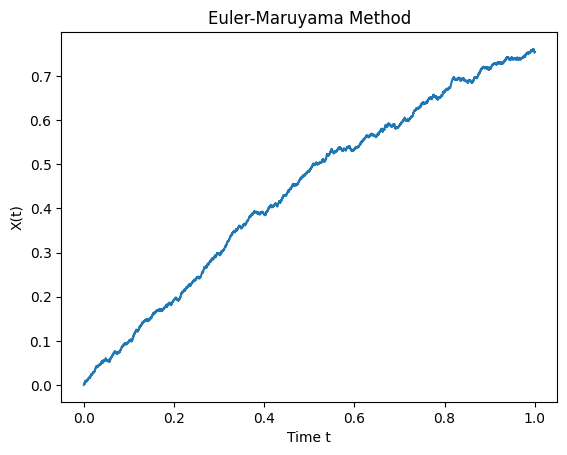

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama(f, g, X0, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i] = X[i-1] + f(X[i-1]) * dt + g(X[i-1]) * dW
    return t, X

# パラメータ設定
T = 1.0  # 終了時間
N = 5000  # ステップ数
X0 = 0.0  # 初期値

# ドリフト項と拡散項の定義（例としてオーンシュタイン・ウーレンベック過程）
def f(x):
    theta = 0.7
    mu = 1.5
    return theta * (mu - x)

def g(x):
    sigma = 0.06
    return sigma

# シミュレーション
t, X = euler_maruyama(f, g, X0, T, N)

# 結果のプロット
plt.plot(t, X)
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.title('Euler-Maruyama Method')
plt.show()


# **ミルスタイン法**

### **特徴**
- オイラー・マルヤマ法を改良し、**拡散項の変化を補正** することで精度を向上させた手法。
- 更新式：
  $
  X_{n+1} = X_n + f(X_n, t_n) \Delta t + g(X_n, t_n) \Delta W_n + \frac{1}{2} g(X_n, t_n) g'(X_n, t_n) (\Delta W_n^2 - \Delta t)
  $

### **長所**
✅ **精度が向上**（強収束1次、局所誤差 $ O(\Delta t) $）  
✅ **確率的な拡散項の影響をより正確に捉える**  

### **短所**
❌ **実装が少し複雑**$( g(X) $ の導関数が必要）  
❌ **計算コストがオイラー・マルヤマ法より高い**  

### **金融工学での応用**
- **幾何ブラウン運動（Geometric Brownian Motion, GBM）** の高精度シミュレーション  
- **確率ボラティリティモデル（Heston Model）** の精度向上  
  → Hestonモデルでは拡散項が非線形なため、オイラー・マルヤマ法よりミルスタイン法の方が精度が高い  
- **オプション価格のモンテカルロ法の精度向上**  

---

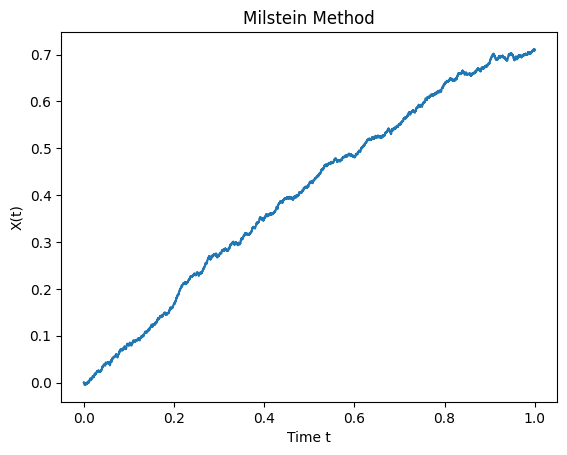

In [6]:
def milstein(f, g, g_prime, X0, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i] = X[i-1] + f(X[i-1]) * dt + g(X[i-1]) * dW + 0.5 * g(X[i-1]) * g_prime(X[i-1]) * (dW**2 - dt)
    return t, X

# gの導関数の定義
def g_prime(x):
    return 0.0  # 今回の例ではg(x)は定数なので導関数は0

# シミュレーション
t, X = milstein(f, g, g_prime, X0, T, N)

# 結果のプロット
plt.plot(t, X)
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.title('Milstein Method')
plt.show()



# **確率ルンゲクッタ法**（SRK法）

### **特徴**
- ルンゲクッタ法のアイデアを確率微分方程式に適用し、**精度をさらに向上** させた方法。
- 例えば4次ルンゲクッタ法（RK4）を使うと、決定論的部分の計算精度が大幅に向上。
- ## **1. 確率ルンゲクッタ法の基本式**
- 確率ルンゲクッタ法は、一般的なルンゲクッタ法を拡張した形をとります。  
  - 2次のSRK法の例を以下に示します：
  - $ X_{n+1} = X_n + a_1 k_1 + a_2 k_2 + g(X_n, t_n) \Delta W_n $
    - ここで：
      - $ k_1 = f(X_n, t_n) \Delta t $
      - $ k_2 = f(X_n + b k_1, t_n + c \Delta t) \Delta t $
      - $ \Delta W_n \sim \mathcal{N}(0, \sqrt{\Delta t}) $ （ブラウン運動の増分）

---

### **長所**
✅ **精度が非常に高い**（強収束2次以上も可能）  
✅ **大きな時間ステップ $ \Delta t $ でも誤差が小さい**  
✅ **収束が速いので長期シミュレーションに有利**  

### **短所**
❌ **計算コストが高い**（中間ステップの計算が増える）  
❌ **実装が複雑**（複数の中間計算が必要）  

### **金融工学での応用**
- **複雑なSDE（ジャンプ拡散モデルや確率ボラティリティモデル）** の数値解  
- **長期的な資産価格シミュレーション**（収束が速いので時間ステップを大きくできる）  
- **アルゴリズムトレーディングのバックテスト**（高精度な確率シミュレーションが必要な場面）  

ルンゲ＝クッタ法について
- https://ja.wikipedia.org/wiki/%E3%83%AB%E3%83%B3%E3%82%B2%EF%BC%9D%E3%82%AF%E3%83%83%E3%82%BF%E6%B3%95

---

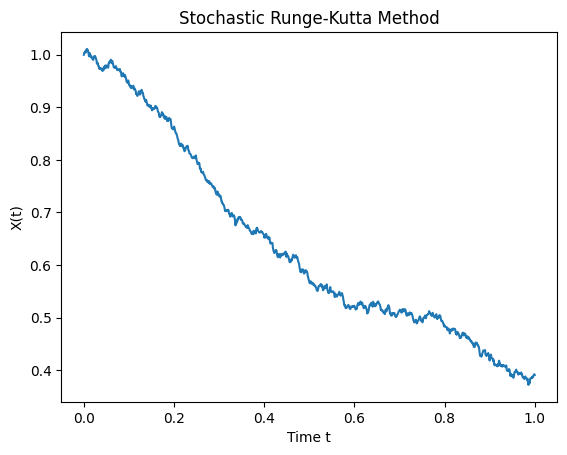

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_sde(f, g, X0, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    X = np.zeros(N)
    X[0] = X0

    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  # ウィーナー過程の増分
        
        # ルンゲクッタの計算
        k1 = f(X[i-1]) * dt
        k2 = f(X[i-1] + 0.5 * k1) * dt
        k3 = f(X[i-1] + 0.5 * k2) * dt
        k4 = f(X[i-1] + k3) * dt

        # SRK法の適用
        X[i] = X[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6 + g(X[i-1]) * dW

    return t, X

# ドリフト項と拡散項の定義
def f(x):
    return -x  # 減衰する力（例えばオーンシュタイン・ウーレンベック過程）

def g(x):
    return 0.1  # 拡散項（ノイズ）

# シミュレーションの実行
T = 1.0  # 終了時間
N = 1000  # ステップ数
X0 = 1.0  # 初期値

t, X = runge_kutta_sde(f, g, X0, T, N)

# 結果のプロット
plt.plot(t, X)
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.title('Stochastic Runge-Kutta Method')
plt.show()


## **まとめ**
| 手法 | 計算コスト | 精度 | 収束の速さ | 用途 |
|------|----------|------|------------|------|
| **オイラー・マルヤマ法** | 低い | 低い（強収束1次） | 遅い | 基本的なSDEのシミュレーション、金融商品のモンテカルロ法 |
| **ミルスタイン法** | 中程度 | 中（強収束1次） | 普通 | Hestonモデル、確率ボラティリティモデルの精度向上 |
| **確率ルンゲクッタ法（SRK法）** | 高い | 高い（強収束2次以上） | 速い | 長期シミュレーション、高精度な金融モデル |

- **大まかなシミュレーション** → **オイラー・マルヤマ法**  
- **精度を少し上げたい** → **ミルスタイン法**  
- **高精度な金融モデリング** → **確率ルンゲクッタ法**  

金融工学では、モデルの特性と計算コストを考慮して、これらの数値解法を使い分けます。

# 確率ルンゲクッタ法の実データでの活用

# **幾何ブラウン運動（GBM）の確率ルンゲクッタ法**

確率ルンゲクッタ法（SRK法）は、金融工学の分野で株価やオプション価格のシミュレーションに利用されます。特に、 Hestonモデル などの確率ボラティリティモデルや、リスク管理のシナリオ分析に応用されます。

今回は yfinance を用いて 実際の株価データ（例：S&P 500 ETF "SPY"）を取得し、幾何ブラウン運動（GBM） を確率ルンゲクッタ法でシミュレーションしてみます。

[*********************100%***********************]  1 of 1 completed
C:\Users\20222305\AppData\Local\Temp\ipykernel_14044\4033390041.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_values[0] = S0


推定年率リターン: 0.2095, 推定ボラティリティ: 0.1277


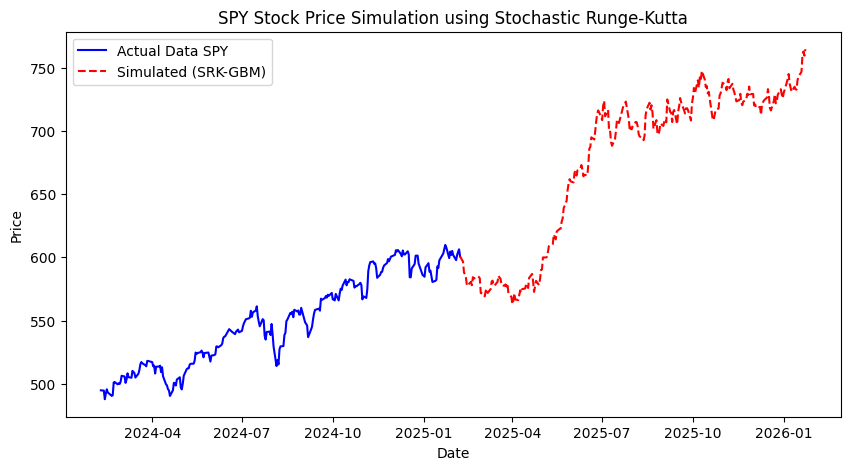

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# ===== 1. データ取得 =====
ticker = "SPY"  # S&P 500 ETF
data = yf.download(ticker, period="1y", interval="1d")

# データが空ならエラーを出さずに終了
if data.empty:
    raise ValueError("データが取得できませんでした。期間を変更して試してください。")

# 欠損値処理
data = data.dropna()

# `Adj Close` のリターン計算
data["Returns"] = data["Close"].pct_change()
data = data.dropna()  # NaNを削除

# ヒストリカル・ボラティリティ（年率）
sigma = data["Returns"].std() * np.sqrt(252)
mu = data["Returns"].mean() * 252  # 年率リターン

print(f"推定年率リターン: {mu:.4f}, 推定ボラティリティ: {sigma:.4f}")

# ===== 2. 確率ルンゲクッタ法で株価シミュレーション =====
T = 1       # 1年間
N = 252     # 252営業日
dt = T / N
S0 = data["Close"].iloc[-1]  # 修正: `iloc[-1]` でデータの最後を取得

# N の値をデータの長さと比較
N = min(252, len(data))  # データ長を超えないようにする

# シミュレーション初期化
t_values = np.linspace(0, T, N+1)
S_values = np.zeros(N+1)
S_values[0] = S0

# 確率ルンゲクッタ法によるGBM
for n in range(N):
    Wn = np.random.normal(0, np.sqrt(dt))  # ブラウン運動の増分
    k1 = mu * S_values[n] * dt
    k2 = mu * (S_values[n] + k1) * dt
    S_values[n+1] = S_values[n] + (0.5 * k1 + 0.5 * k2) + sigma * S_values[n] * Wn

# ===== 3. 実データ vs シミュレーションの比較 =====
plt.figure(figsize=(10,5))
plt.plot(data.index[-N:], data["Close"].iloc[-N:], label=f"Actual Data {ticker}", color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=N+1, freq='B'), S_values, label="Simulated (SRK-GBM)", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{ticker} Stock Price Simulation using Stochastic Runge-Kutta")
plt.legend()
plt.show()


In [29]:
print(data.tail())  # 直近のデータを表示

print(len(data))  # データの長さを確認


Price            Close        High         Low        Open    Volume   Returns
Ticker             SPY         SPY         SPY         SPY       SPY          
Date                                                                          
2025-02-03  597.770020  600.289978  590.489990  592.669983  65857200 -0.006730
2025-02-04  601.780029  602.299988  597.280029  597.830017  33457800  0.006708
2025-02-05  604.219971  604.369995  598.580017  600.640015  30653100  0.004055
2025-02-06  606.320007  606.450012  602.630005  605.989990  35771500  0.003476
2025-02-07  600.770020  608.130005  600.049988  606.890015  50677600 -0.009154
250


In [17]:
print(data.isnull().sum())  # 欠損値の数を表示


Price      Ticker
Adj Close  APPL      0
Close      APPL      0
High       APPL      0
Low        APPL      0
Open       APPL      0
Volume     APPL      0
Returns              0
dtype: int64


# **Hestonモデルの確率ルンゲクッタ法**（SRK法）

[Python\practice_to_be_exchange_student\20250207_SDE.ipynb](20250207_SDE.ipynb)

Heston モデルは、ボラティリティが確率過程に従う 拡張型の確率微分方程式（SDE）です。これは、幾何ブラウン運動（GBM）とは異なり、市場のボラティリティ・クラスタリングを考慮できます。

今回は Heston モデルの確率ルンゲクッタ法（SRK法） を使って、SPY（S&P 500 ETF）のシミュレーションを行います。

[*********************100%***********************]  1 of 1 completed
C:\Users\20222305\AppData\Local\Temp\ipykernel_14044\2655758186.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_values[0] = S0


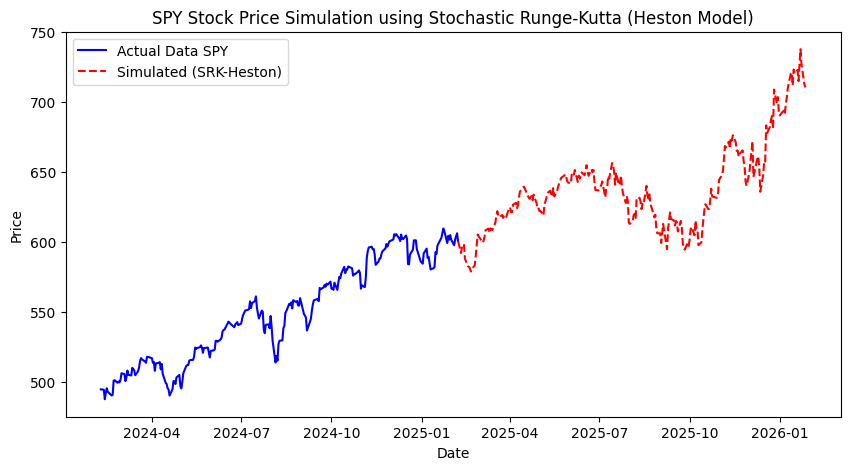

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# ===== 1. データ取得 =====
ticker = "SPY"  # S&P 500 ETF
data = yf.download(ticker, period="1y", interval="1d")

# 欠損値処理
data = data.dropna()

# `Adj Close` のリターン計算
data["Returns"] = data["Close"].pct_change()
data = data.dropna()  # NaNを削除

# ヒストリカル・ボラティリティ（年率）
sigma = data["Returns"].std() * np.sqrt(252)
mu = data["Returns"].mean() * 252  # 年率リターン

# Heston モデルのパラメータ
kappa = 2.0       # 平均回帰速度
theta = sigma**2  # 長期平均ボラティリティ
sigma_v = 0.3     # ボラティリティのボラティリティ
rho = -0.7        # W_t^S と W_t^v の相関

# ===== 2. HestonモデルのSRK法によるシミュレーション =====
T = 1       # 1年間
N = 252     # 252営業日
dt = T / N
S0 = data["Close"].iloc[-1]  # 株価の初期値
v0 = sigma**2  # 初期ボラティリティ

# シミュレーション初期化
t_values = np.linspace(0, T, N+1)
S_values = np.zeros(N+1)
v_values = np.zeros(N+1)
S_values[0] = S0
v_values[0] = v0

# 乱数生成（W_t^S と W_t^v）
dW_S = np.random.normal(0, np.sqrt(dt), N)
dW_V = np.random.normal(0, np.sqrt(dt), N)
dW_V = rho * dW_S + np.sqrt(1 - rho**2) * dW_V  # 相関を考慮

# Heston モデルのSRK法
for n in range(N):
    # ボラティリティ過程のSRK
    k1_v = kappa * (theta - v_values[n]) * dt + sigma_v * np.sqrt(v_values[n]) * dW_V[n]
    k2_v = kappa * (theta - (v_values[n] + k1_v)) * dt + sigma_v * np.sqrt(v_values[n] + k1_v) * dW_V[n]
    v_values[n+1] = max(v_values[n] + 0.5 * (k1_v + k2_v), 0)  # 負のボラティリティを防ぐ

    # 株価過程のSRK
    k1_S = mu * S_values[n] * dt + np.sqrt(v_values[n]) * S_values[n] * dW_S[n]
    k2_S = mu * (S_values[n] + k1_S) * dt + np.sqrt(v_values[n+1]) * (S_values[n] + k1_S) * dW_S[n]
    S_values[n+1] = S_values[n] + 0.5 * (k1_S + k2_S)

# ===== 3. 実データ vs Hestonモデルの比較 =====
plt.figure(figsize=(10,5))
plt.plot(data.index[-N:], data["Close"].iloc[-N:], label=f"Actual Data {ticker}", color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=N+1, freq='B'), S_values, label="Simulated (SRK-Heston)", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{ticker} Stock Price Simulation using Stochastic Runge-Kutta (Heston Model)")
plt.legend()
plt.show()


### Heston モデルの実務での応用
- オプション価格のシミュレーション（Black-Scholesモデルの改良版）
- リスク管理（ボラティリティの変動を考慮したリスク評価）
- アルゴリズムトレーディング（ボラティリティに応じたポジション管理）

Heston モデルの方が 実際の金融市場に近いダイナミクス を捉えることができるため、GBM よりもリアルなシミュレーションが可能になります

# 洞察
Q:Hestonモデルの確率ルンゲクッタ法は毎回別の予測結果を表示しますが、これはランダムウォークやHeastonモデルなどの確率微分方程式が原因ですね？また、
これらの結果をモンテカルロシミュレーションに入れることで精度の高い一つの予測結果が得られるということですか？

A:はい、その通りです。Hestonモデルやランダムウォーク、その他の確率微分方程式（SDE）は、確率的なプロセスを模倣しているため、毎回異なる結果が得られます。これらのモデルは、将来の価格やボラティリティを予測するために確率的な要素を導入しています。したがって、同じ初期条件でも、シミュレーションを複数回実行すると、結果にばらつきが出ます。

モンテカルロシミュレーションでは、こうした確率的な過程を多数回シミュレートして平均的な結果を求めます。このようにして、ランダムなばらつきが平均化され、より正確な予測が得られるという仕組みです。複数回のシミュレーションを行うことで、全体の確率分布を反映させ、精度の高い予測結果を得ることができます。

モンテカルロシミュレーションは、特に不確実性のあるモデルで有効な手法であり、確率微分方程式を使ったシミュレーションにもよく適用されます。